
# Проверка гипотез для увеличения выручки интернет-магазина 

---
## Цель проекта

Проведение А/В теста с целью увеличения выручки интернет-магазина.

---
## Задачи проекта

1. Приоритизация гипотез для увеличения выручки интернет-магазина;
2. Проведение А/В теста и анализ его результатов

---
## План

1. Подготовка данных;
2. Приоритизация гипотез;
3. Анализ А/В теста;
4. Анализ кумулятивных метрик;
5. Анализ аномальных значений;
6. Принятие решений по результатам А/В теста.

---
## Описание данных

Данные для первой части\
Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части\
Файл /datasets/orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


---
## Загрузка и предобработка данных

In [10]:
# импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [11]:
# загрузка файлов
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv'))
except:
     hypothesis, orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'))

In [12]:
# напишем функцию для изучения основных характеристик датафрейма
def df_study(df):
      
    # изучим начало и конец выборки
    display(df.head(10), df.tail(10))

    # изучим информацию о датафрейме
    display(df.info())
    
    # изучим статистические показатели
    display(df.describe())
    
    print('-'*50)
    # изучим количество строк и столбцов
    print('Количество строк и столбцов:', df.shape)   

    print('-'*50)
    # посчитаем количество явных дубликатов
    dubl = df.duplicated().sum()
    print('Количество явных дубликатов:' , dubl)
    
    print('-'*50)
    # посчитаем количество пропусков
    gap = df.isna().sum()
    print('Количество пропусков:', gap)
    
    # зададим масимальную ширину столбца
    pd.set_option('max_colwidth', 100) 

---
### Изучение и предобработка датасета hypothesis

In [13]:
# изучим основную информацию
df_study(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


--------------------------------------------------
Количество строк и столбцов: (9, 5)
--------------------------------------------------
Количество явных дубликатов: 0
--------------------------------------------------
Количество пропусков: Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


Значения в таблице находятся в верных пределах, тип данных корректен. Дубликаты и пропуски отсутствуют. В процессе предобработки данных приведем названия столбцов к нижнему регистру.

In [14]:
# приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

# проверка
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


---
### Изучение и предобработка датасета orders

In [15]:
# изучим основную информацию
df_study(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


--------------------------------------------------
Количество строк и столбцов: (1197, 5)
--------------------------------------------------
Количество явных дубликатов: 0
--------------------------------------------------
Количество пропусков: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Необходимо привести названия некоторых стобцов к корректному виду (прыгающий регистр) и изменить тип данных в столбце с датой заказа.

In [16]:
# переименуем столбцы
orders = orders.rename(
        columns={
            'transactionId':'transaction_id',
            'visitorId':'visitor_id'
        })

# преобразуем данные о времени
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# проверка
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [17]:
# проверим временной интервал в датасете
print('Минимальная дата совершения заказа:', orders['date'].min())
print('Максимальная дата совершения заказа:', orders['date'].max())

Минимальная дата совершения заказа: 2019-08-01 00:00:00
Максимальная дата совершения заказа: 2019-08-31 00:00:00


In [18]:
# проверим уникальные значения в столбце с группа А/В теста и количество заказов в группах
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [19]:
# проверим общее количество уникальных пользователей в двух группах
orders.groupby('group').agg({'visitor_id' : 'nunique'})

,visitor_id
group,
A,503
B,586


In [20]:
# посмторим на количество уникальных пользователей, которые оказались одновременно в двух группах
unique_visitors = orders.loc[:, ['visitor_id', 'group']].drop_duplicates().drop(columns=['group'])
unique_visitors.visitor_id.duplicated().sum()

58

Заказы были совершены с 1 по 31 августа 2019 г. Наименования групп верные. Количество заказов и уникальных пользователей в группах неравномерное.

---
### Изучение и предобработка датасета visitors

In [21]:
# изучим основную информацию
df_study(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


--------------------------------------------------
Количество строк и столбцов: (62, 3)
--------------------------------------------------
Количество явных дубликатов: 0
--------------------------------------------------
Количество пропусков: date        0
group       0
visitors    0
dtype: int64


In [22]:
# преобразуем данные о времени
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [23]:
# проверим временной интервал в датасете
print('Минимальная дата совершения заказа:', visitors['date'].min())
print('Максимальная дата совершения заказа:', visitors['date'].max())

Минимальная дата совершения заказа: 2019-08-01 00:00:00
Максимальная дата совершения заказа: 2019-08-31 00:00:00


In [24]:
# проверим уникальные значения в столбце с группа А/В теста
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [25]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


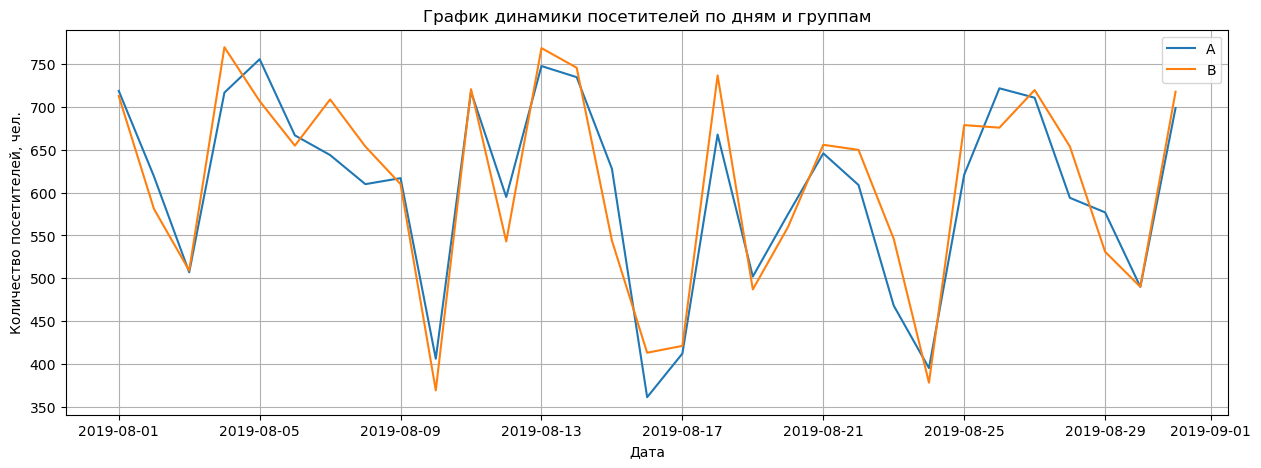

In [26]:
# посмотрим динамику посетителеq по дням и группам
# датафреймы по группам
visitors_a = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_b = visitors[visitors['group']=='B'][['date', 'visitors']]

# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('График динамики посетителей по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Количество посетителей, чел.')

# cтроим график выручки группы А
plt.plot(visitors_a['date'], visitors_a['visitors'], label='A')

# cтроим график выручки группы B
plt.plot(visitors_b['date'], visitors_b['visitors'], label='B')

plt.legend()
plt.show()

Данные представлены за период с 1 по 31 августа 2019 г. Наименования групп верные.
График динамики посетителей по дням и группам показал, что количество посетителей интернет-магазина по группам практически одинаковые.

---
## Часть 1. Приоритизация гипотез

---
### Применение фреймворка ICE для приоритизации гипотез

In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)

# применим фраймворк ICE
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


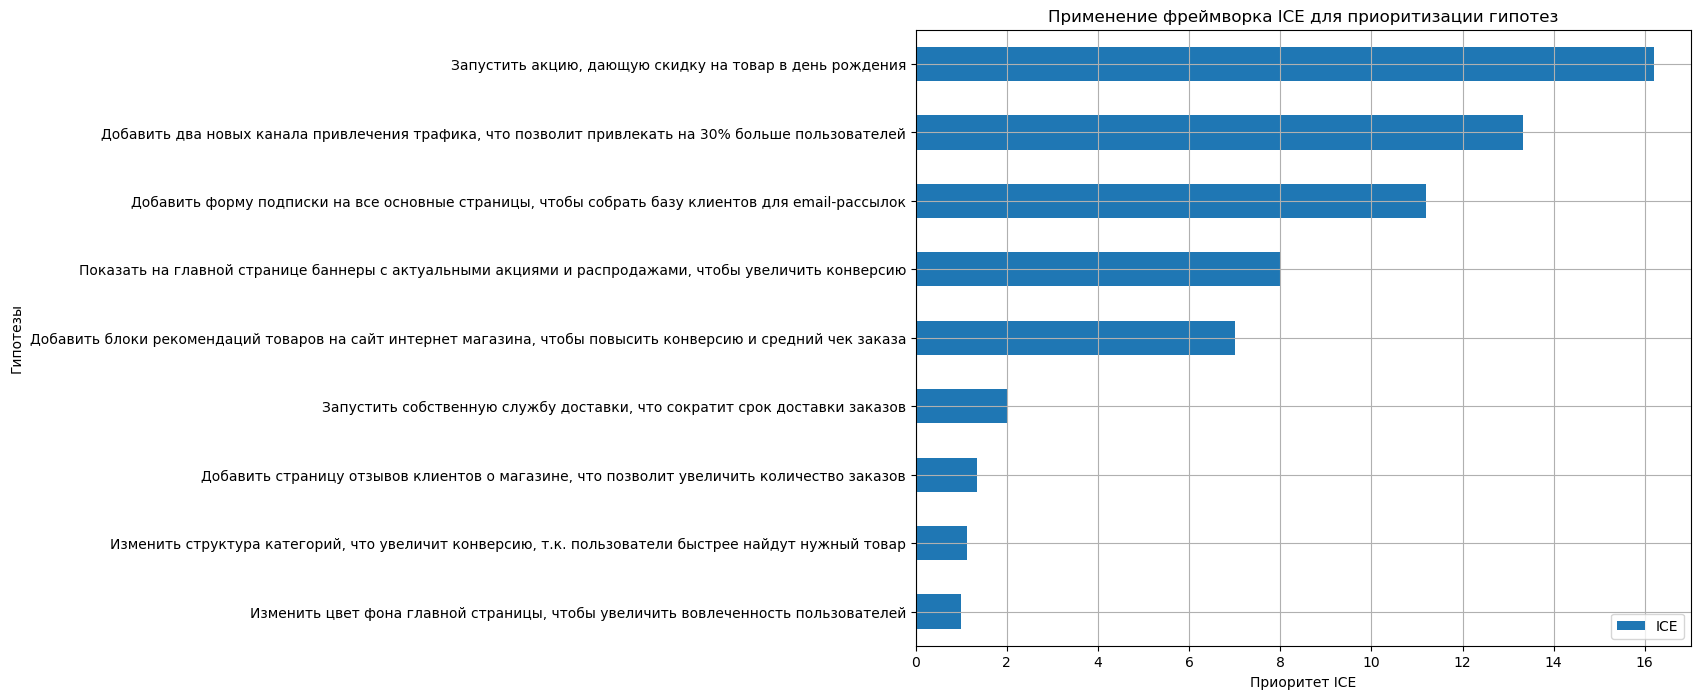

In [28]:
# отразим приоритезацию на графике
hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values(by='ICE').plot(
        kind = 'barh',
        grid = True,
        stacked = True,
        title = 'Применение фреймворка ICE для приоритизации гипотез',
        figsize = (10,8))
plt.xlabel('Приоритет ICE')
plt.ylabel('Гипотезы')
    
plt.show()

---
### Применение фреймворка RICE для приоритизации гипотез

In [29]:
# применим фраймворк RICE
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


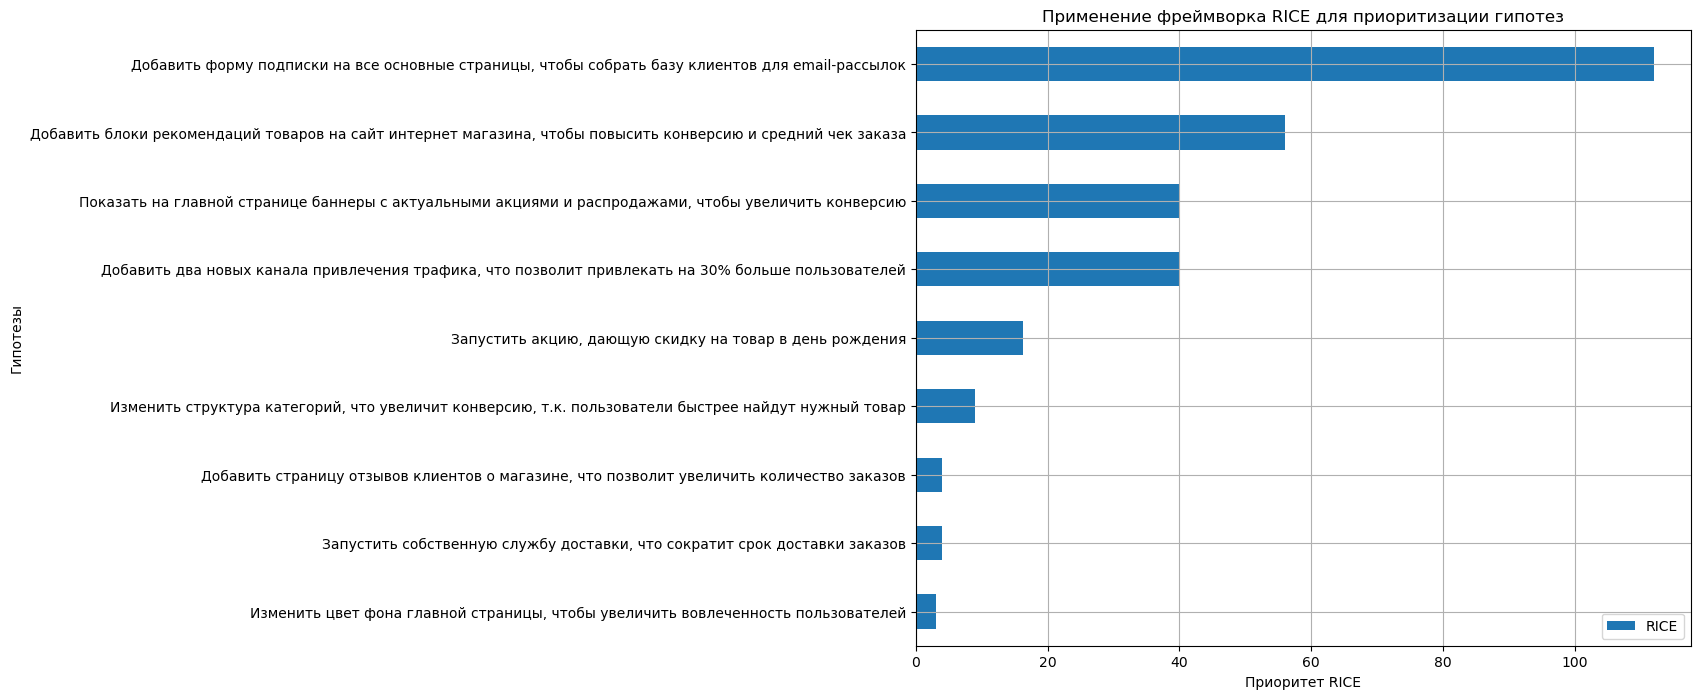

In [30]:
# отразим приоритезацию на графике
hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values(by='RICE').plot(
        kind = 'barh',
        grid = True,
        stacked = True,
        title = 'Применение фреймворка RICE для приоритизации гипотез',
        figsize = (10,8))
plt.xlabel('Приоритет RICE')
plt.ylabel('Гипотезы')
    
plt.show()

---
### Сравнение приоритезации при применении фреймворков  ICE и RICE

In [31]:
print('Топ-5 гипотез по ICE')
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head())

print('Топ-5 гипотез по RICE')
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head())

Топ-5 гипотез по ICE


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00


Топ-5 гипотез по RICE


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20


Топ-5 гипотез при применении фраймфорков ICE и RICE совпадает, но гипотезы расположены на разных местах. Лидер топа по ICE гипотеза о скидке в день рождения расположен на 5-м месте в топе по RICE. Лидер по RICE - гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 
Такая расстановка гипотез по степени приоритетности связана с тем, что применение фраймфорка RICE включает в себя параметр 'Reach', который показывает, скольких пользователей затронет изменение. В отличие от лидера по RICE гипотеза о скидке в день рождения имеет низкий охват, так как данной скидкой посетители могут воспользоваться только раз в год.

---
## Часть 2. Анализ A/B-теста

In [32]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [33]:
# проверим корректно ли был создан новый датафрейм
print('Максимальная дата:', cumulativeData['date'].max())
print('Минимальная дата:', cumulativeData['date'].min())

Максимальная дата: 2019-08-31 00:00:00
Минимальная дата: 2019-08-01 00:00:00


Временной интервал верный.

---
### График кумулятивной выручки

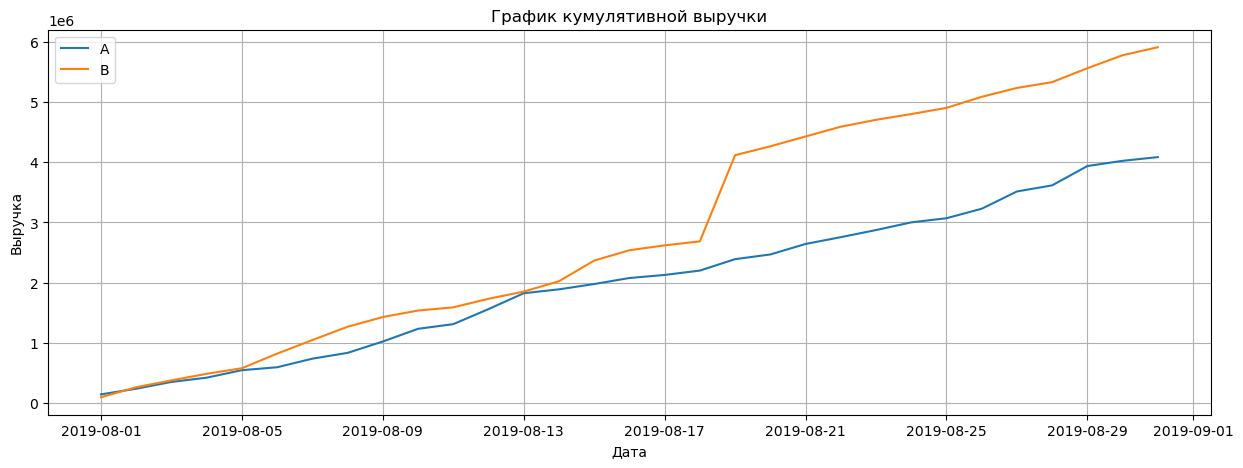

In [34]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка')

# cтроим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# cтроим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

По графику можно сделать следующие выводы: выручка у обоих групп растет на протяжении всего теста. Примерно до 18 августа показатель находится на одном уровне у обоих групп, но с 18 числа выручка у группы В резко возросла и постепенно увеличивалась до конца теста. Данный скачок может быть связан с наличием большого количества заказов или наличием очень дорогих заказов у группы В.

---
### График кумулятивного среднего чека

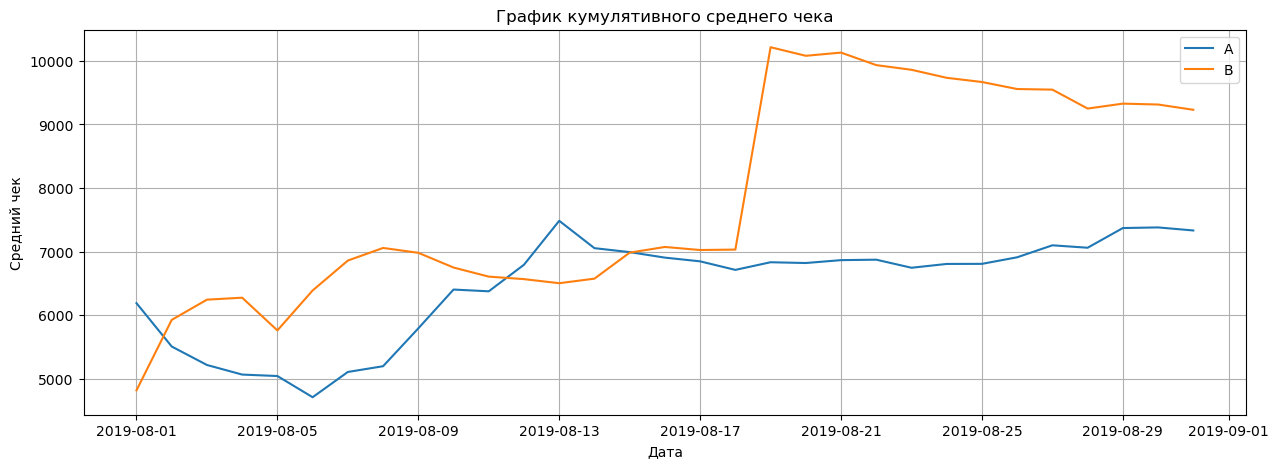

In [35]:
# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

# cтроим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# cтроим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

Кумулятивное значение среднего чека увеличивалось у обоих групп примерно до середины месяца (до 13 августа для группы А и 18 августа для группы В). Для группы В стоит отметить резкий скачок среднего чека 18 августа. Можно предположить, что данный рост связан с наличием дорогих заказов.
После данных скачков идет плавное снидение среднего чека.

---
### График относительного изменения кумулятивного среднего чека группы B к группе A

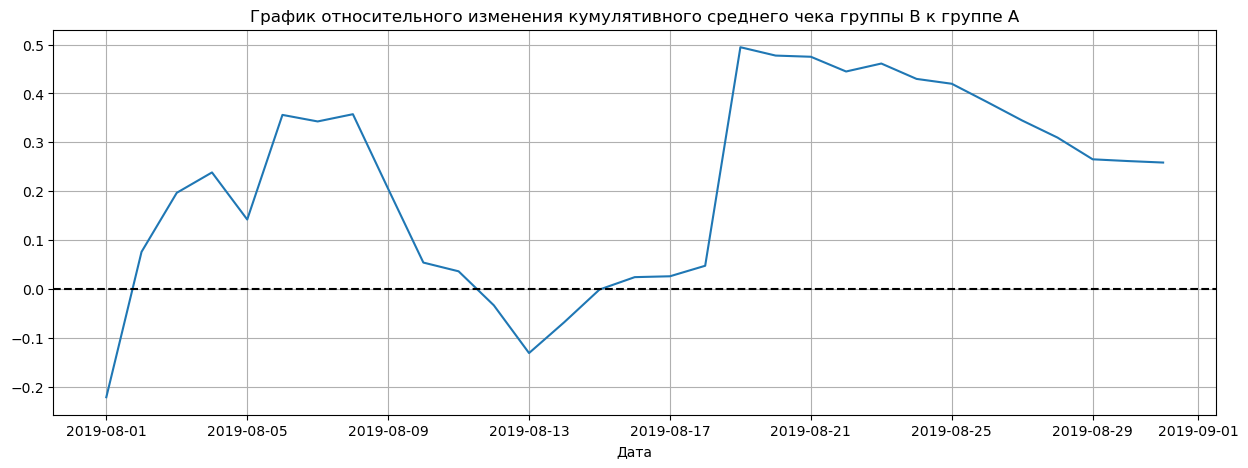

In [36]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках график различия между сегментами резко «скачет». График подтверждает выводы, сделанные по предыдущим графикам (скачок 18 августа).

---
### График кумулятивной конверсии

(18109.0, 18140.0, 0.0, 0.05)

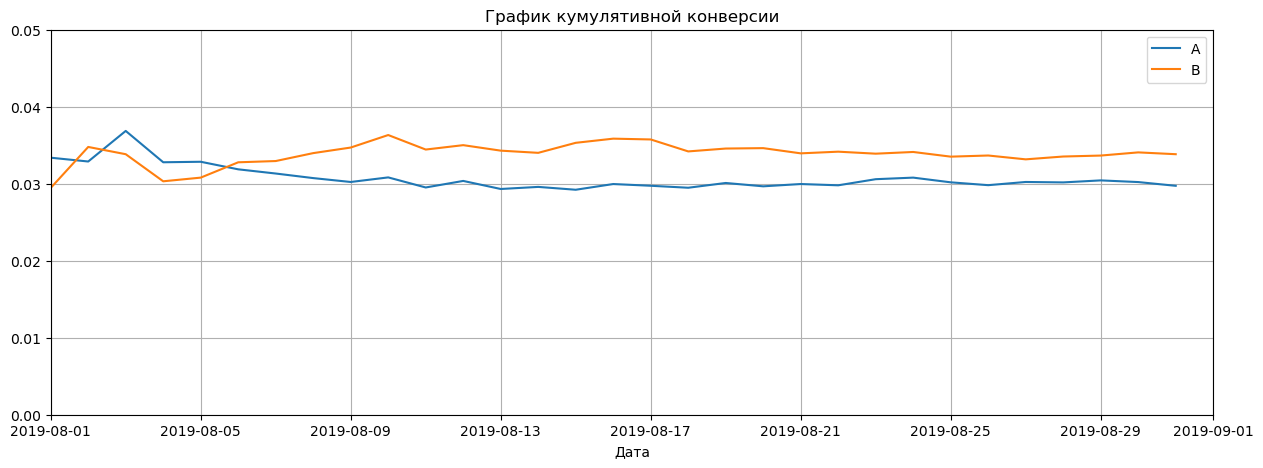

In [37]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

График плавный. До 6 августа группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

---
### График относительного изменения кумулятивной конверсии группы B к группе A

ConversionError: Failed to convert value(s) to axis units: array(['2019-08-01T00:00:00.000000000', '2019-08-02T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-07T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-21T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-23T00:00:00.000000000', '2019-08-24T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-26T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-08-29T00:00:00.000000000', '2019-08-30T00:00:00.000000000',
       '2019-08-31T00:00:00.000000000'], dtype='datetime64[ns]')

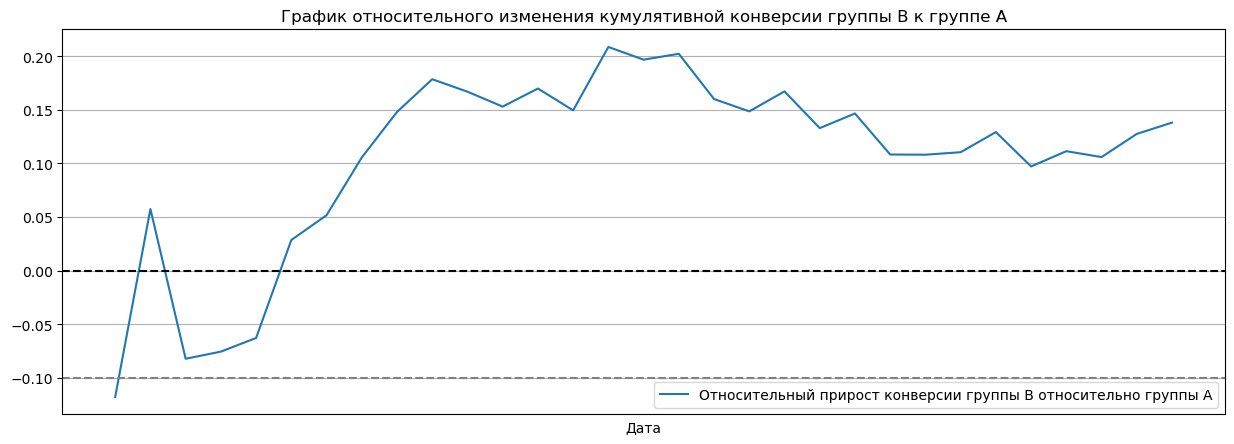

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                                               left_on='date', 
                                                                                               right_on='date', 
                                                                                               how='left', 
                                                                                               suffixes=['A', 'B'])

# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label='Относительный прирост конверсии группы B относительно группы A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.5, 0.5])

В начале теста группа B проигрывала группе A. С 6 августа группа В вырвалась вперёд и зафиксировалась примерно на одном уровне.

---
### Точечный график количества заказов по пользователям

In [ ]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']


# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей, чел.')
plt.ylabel('Количество заказов, шт.')

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

Основная доля пользователей совершает 1 заказ. Достаточное количество пользователей совершают 2 заказа. Пользователей с 3 и более заказами крайне мало.

---
### Расчет 95-го и 99-го перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [ ]:
# находит перцентили
print('95 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

Не более 5% пользователей совершали больше 2 заказов. И не более 1% пользователей - больше 4 заказов.\
Определим 4 заказа на одного пользователя за верхнюю границу числа заказов и отсеим аномальных пользователей по ней.

---
### Точечный график стоимостей заказов 

In [ ]:
# задаём размер сетки для графиков, названия графика и осей
plt.figure(figsize=(15, 5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей, чел.')
plt.ylabel('Стоимость заказов, млн.')

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.show()

На графике можно отметить 2 аномальных заказа со стоимостями более 1,2 млн. и 0,2 млн. Стоимость остальныз заказов значительно ниже.

---
### Расчет 95-го и 99-го перцентиля стоимости заказов. Выбор границы для определения аномальных пользователей.

In [ ]:
# находит перцентили
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

Не более, чем у 5% заказов чек дороже 28000. У 1% заказов чек составляет 58233. \
Определим 58233.20 за верхнюю границу стоимости заказа и отсеим аномальных пользователей по ней.

---
### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Н0 : различий в среднем количестве заказов между группами нет. \
Н1 : различия в среднем количестве заказов между группами есть.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего группы В к конверсии группы А: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

P-value меньше 0.05, значит нулевую гипотезу об отсутствии различий в среднем количестве заказов между группами отвергаем. Анализ "сырых" данных показал, что в среднем количестве заказов между группами есть статистически значимые различия.\
Относительный прирост среднего группы В к конверсии группы А равен 13.8%.

---
### Расчет статистической значимости различий в среднем чеке между группами по «сырым» данным

Н0 : различий в среднем чеке между группами нет. \
Н1 : различия в среднем чеке между группами есть.

In [ ]:
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                   orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                                                    /orders[orders['group']=='A']['revenue'].mean()-1))

P-value значительно больше 0.05. Статистически значимых отличий в среднем чеке между группами нет. 
Относительное различие среднего чека между сегментами составляет 25,9%.

---
### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [ ]:
# зададим предельные значения для аномальных пользователей
limit_orders = np.percentile(ordersByUsers['orders'], [99])
limit_revenue = np.percentile(orders['revenue'], [99])

In [ ]:
# срезы пользователей по количеству заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > limit_orders[0]]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > limit_orders[0]]['visitor_id'],
    ],
    axis=0,
)

# срезы пользователей по стоимости заказов
usersWithExpensiveOrders = orders[orders['revenue'] > limit_revenue[0]]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', abnormalUsers.shape[0]) 

In [ ]:
#  сохраним очищенные данные о заказах
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Н0 : различий в среднем количестве заказов между группами нет. \
Н1 : различия в среднем количестве заказов между группами есть.

In [ ]:
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего очищенной группы B: {0:.3f}'.format(sampleBFiltered.mean()
                                                                          /sampleAFiltered.mean()-1))

Как и по "сырым" данным P-value меньше 0.05, значит нулевую гипотезу об отсутствии различий в среднем количестве заказов между группами отвергаем. \
Относительный прирост среднего группы В к конверсии группы А равен 17.3%.

---
### Расчет статистической значимости различий в среднем чеке между группами по «очищенным» данным

In [ ]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный прирост среднего чека очищенной группы B: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value значительно больше 0.05 и находится примерно на том же уровне, что и с "сырыми" данными. Статистически значимых отличий в среднем чеке между группами нет. 
Средний чек у группы В снизился и стал меньше среднего чека группы А (на 2 %).

---
### Решение по результатам А/В теста

Результаты теста:
- Есть статистически значимое различие по конверсии между группами А и В как по сырым данным, так и после фильтрации аномалий.
- По сырым и по «очищенным» данным нет статистически значимого различия по среднему чеку между группами.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения.

На основе этих результатов предлагаю останосить тест и зафиксировать победу группы В, так как группа B статистически значимо лучше группы A по обеим метрикам, а график конверсии говорит о фиксации результата.
